In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [2]:
train_data = datasets.MNIST(
  root="data",
  train=True,
  transform=ToTensor(),
  download=True
  
)
test_data = datasets.MNIST(
  root="data",
  train=False,
  transform=ToTensor(),
  download=True
  
)

In [3]:
from torch.utils.data import DataLoader

loaders={
  'train': DataLoader(train_data, 
                     batch_size=100,
                     shuffle=True,
                     num_workers=1),
  'test': DataLoader(test_data, 
                    batch_size=100,
                    shuffle=True,
                    num_workers=1),

}

In [4]:
loaders


{'train': <torch.utils.data.dataloader.DataLoader at 0x155df3a10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x155df3a90>}

In [5]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2)) 
        x= F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2)) 
        
        x = x.view(-1, 20*4*4)  
        x = F.relu(self.fc1(x))  
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        
        return F.softmax(x)
      

In [6]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model= CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')
      
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()
      
  test_loss /= len(loaders['test'].dataset)
  print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')

In [7]:
for epoch in range(1, 11):
  train(epoch)
  test()

/var/folders/z9/kp8473s15qj359p037xgnv8m0000gn/T/ipykernel_91520/2429167214.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303497
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.292529
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.189135
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.065634
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.948128
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.896376
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.854716
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.719756
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.848924
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.728699
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.823552
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.758040
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.709952
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.643866
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.615521
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.691000
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.630526
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.676932
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.661536
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.641044
Train Epoch

In [8]:
device

device(type='cpu')

Prediction: 0


/var/folders/z9/kp8473s15qj359p037xgnv8m0000gn/T/ipykernel_91520/2429167214.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


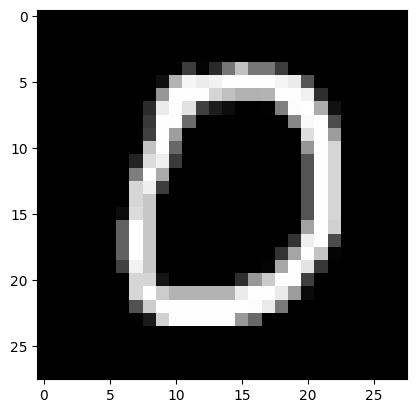

In [14]:
import matplotlib.pyplot as plt

model.eval()
data,target=test_data[10]

data=data.unsqueeze(0).to(device)
output=model(data)

predi=output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {predi}')

image=data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()
